<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    Air Quality forecasting(CO2 emissions)  🛒<br>
    </p> 
<p style="font-family:verdana;text-align:center">***************</p>


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 1 : Understand The Business Problem </h2> 

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Business Statement 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
          To forecast Co2 levels for an organization so that the organization can follow government norms
with respect to Co2 emission levels.
        </p>
    </div>

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 2 : Load The Data </h2> 

In [36]:
#Importing libraries
import warnings
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss 

import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the data
data = pd.read_excel('CO2 dataset.xlsx')
data.head()                   # will show 1st 5 rows only

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 3: EDA and Visualization </h2> 

In [3]:
data.shape  # will show rows and columns

(215, 2)

In [4]:
data.isnull().sum()          # This functin will show the total null values in our data

Year    0
CO2     0
dtype: int64

In [5]:
data.info()             # this function will show the all information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [6]:
data.describe()          # This function will describe the data

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [7]:
data.skew()  # positively skewed

Year    0.000000
CO2     0.362736
dtype: float64

In [8]:
len(data[data['CO2']<1]) # 37% CO2 values are less then 1 

80

In [9]:
data[data['CO2'] == data['CO2'].max()]


,Year,CO2
179,1979.0,18.2


In [10]:
data[data.duplicated()]              # No duplicated data present in ur dataset

,Year,CO2


In [11]:
data['Year'] = data['Year'].astype(int)      #convert the year column from float to int
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


<h2 style="color:#DC7633;">Visualization </h2>


In [12]:

data.index = pd.to_datetime(data['Year'], format='%Y')
data.drop('Year',axis=1, inplace=True)
data.head()


,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


##### <h2 style="color:#DC7633;">Density Plot</h2>


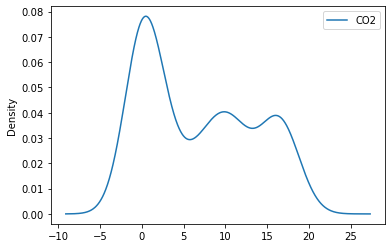

In [14]:
data.plot(kind='kde')
pyplot.show()

5 <h2 style="color:#DC7633;">Histogram</h2>


array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

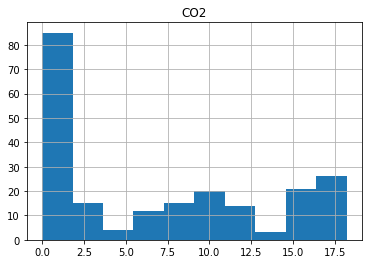

In [15]:
 data.hist()



<AxesSubplot:ylabel='Count'>

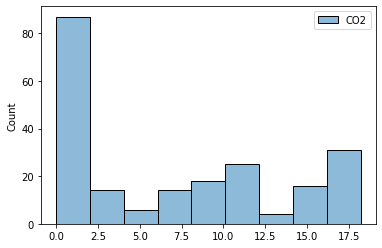

In [16]:
 import seaborn as sns
sns.histplot(data) 


<h2 style="color:#DC7633;">Line plot</h2>


<AxesSubplot:xlabel='Year'>

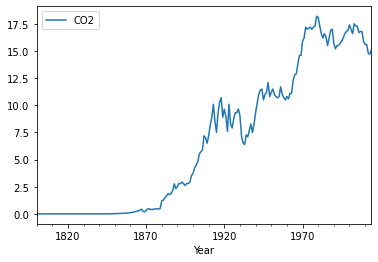

In [17]:
data.plot()              # we can see there is a upword trend in plot

<h2 style="color:#DC7633;">Box Plot</h2>


<AxesSubplot:xlabel='CO2'>

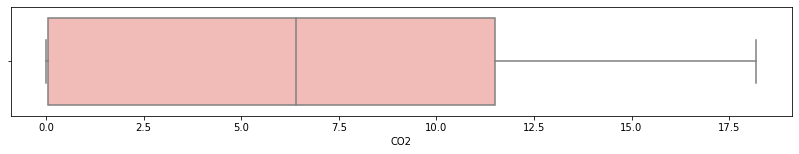

In [18]:
# Boxplot for ever
import seaborn as sns
plt.figure(figsize=(14,2))
sns.boxplot(x = data['CO2'], palette='Pastel1')

<h2 style="color:#DC7633;">Lag Plot</h2>


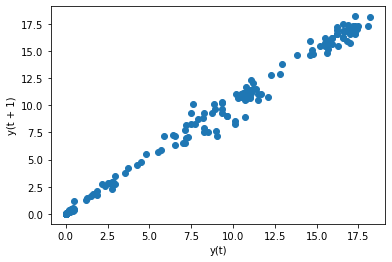

In [19]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(data)
pyplot.show()                  # data is linear

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) After the total observation we can see the trend of our data and we have higher rate between -5 to +5<br><br>
          2) There is trend in ur data because after some perid its going high suddenly and its moving up direction<br><br>
           3) The Data is linear we can see using log plot
        </p>
    </div>



<h2 style="color:#DC7633;">seasonal_decomposet</h2>


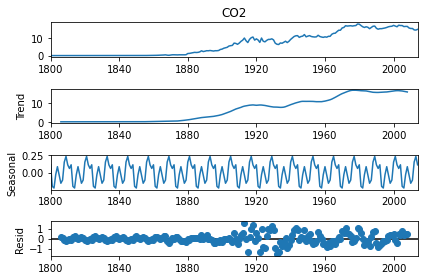

In [20]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.CO2,period=12)
decompose_ts_add.plot()
plt.show()

<AxesSubplot:xlabel='Year'>

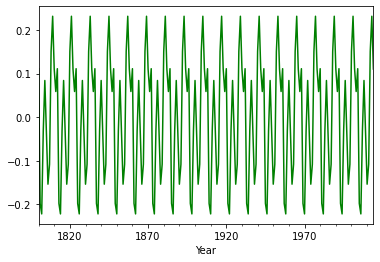

In [21]:
seasonality=decompose_ts_add.seasonal
seasonality.plot(color='green')

 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) In the seasonality graph, we can see the seasonality structure for every year, which is cyclic and repeatedly providing the same value. <br><br>
  2) To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an              autocorrelation plot.<br>
        </p>
    </div>

<h2 style="color:#DC7633;">ACF Plot</h2>


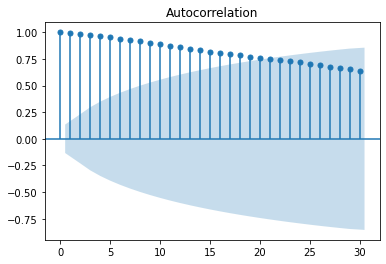

In [22]:
#To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an autocorrelation plot.
# It will check the correlation between previous data 
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data,lags=30)

pyplot.show()

 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        1)  Here the blue area is the confidence interval<br><br>
         2) Each candle is present on previous or historical data it means if we know the historical/Past year CO2 then we             can forecast next year CO2 <br><br>
           3) There are strongly psitive correlation 
    </p>
    </div>


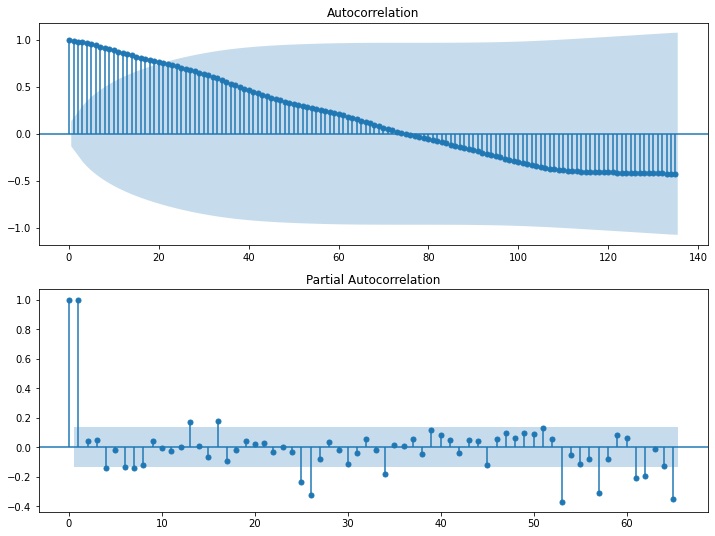

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and partial auto correlation
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['CO2'],lags=135,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['CO2'],lags=65,ax=ax2, method='yw')

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 4 : Pre-Process Data </h2> 

<h3 style="color:orange;">Stationary data means? </h3>

1) constant mean

2) constant variance

3) constant covariance (uncorrelated)

We verify this by observing change in mean, variance, autocorrelation and with a statistical test (ADFuller test)


 <h3 style="color:green;">Following are the Techniques to check data is stationary or not ?</h3>

1) Augmented Dickey-fuller test

2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

3) Rolling Statistics


<h3 style="color:blue;">1) Augmented Dickey-fuller test or not? </h3>


In [24]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")


print("\n > Is the de-trended data stationary ?")
dftest = adfuller(data['CO2'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

Observations of Dickey-fuller test

 > Is the de-trended data stationary ?
Test statistic = -0.378
P-value = 0.914
Critical values :
	1%: -3.4612821203214907 - The data is not stationary with 99% confidence
	5%: -2.875142613826617 - The data is not stationary with 95% confidence
	10%: -2.574020122281422 - The data is not stationary with 90% confidence


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        Augmented Dicky Fuller test is a statistical test for stionarity.<br> 
        If the p value is less than 0.05, the series is stationary, otherwise non-stationary. 
    </p>
    </div>

<h3 style="color:blue;">2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS) or not? </h3>


In [25]:
result_kpss_ct_log=kpss(data['CO2'],regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.220000
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.      
    </p>
    </div>

 <h3 style="color:blue;">3) Rolling Statistics Test</h3>


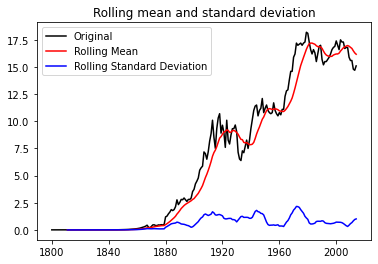

In [26]:
rmean=data.rolling(window=12).mean()
rstd=data.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        In this graph we can see mean and variance is not constant so we can say our data is non stationary 
    </p>
    </div>

  <h2 style="color:Orange;">    Making Time Series Stationary Test</h2>
<h3 style="color:Green;">    Differencing Test</h3>
<h4 style="color:blue;">  First  Differencing Test</h4>


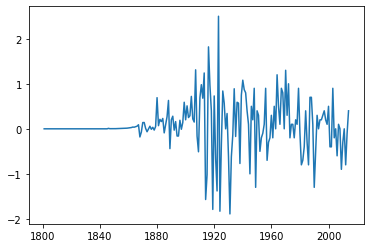

In [27]:
import numpy as np

 # making the data stationary
#data['First Difference'] = data['CO2'] - data['CO2'].shift(1)
#plt.plot(data['First Difference'])
data1=data.copy()
data1['First Difference'] = data['CO2'] - data['CO2'].shift(1)
plt.plot(data1['First Difference'])

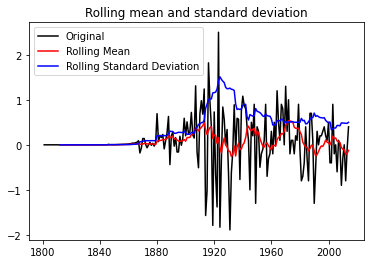

In [28]:
rmean=data1['First Difference'].rolling(window=12).mean()
rstd=data1['First Difference'].rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data1['First Difference'] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [29]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(data1['First Difference'].dropna(),autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

 > Is the data stationary ?
Test statistic = -3.780
P-value = 0.003
Critical values :
	1%: -3.4638151713286316 - The data is  stationary with 99% confidence
	5%: -2.876250632135043 - The data is  stationary with 95% confidence
	10%: -2.574611347821651 - The data is  stationary with 90% confidence


In [30]:
result_kpss_ct_log=kpss(data1['First Difference'].dropna(),regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.110000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) p value is less than 0.05, the series is stationary. <br>
        2) In this graph we can see mean and variance is not constant so we can say our data is non stationary<br> 
         3) If the p-value is greater than a predefined alpha level (typically 0.05), we accept the null hypothesis.      
    </p>
    </div>

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 5 : Partition of Data </h2> 

In [37]:
train=data.head(180)    # first 180 rows will be stored in train variable
test=data.tail(35)      # last 35 rows will be stored in test variable

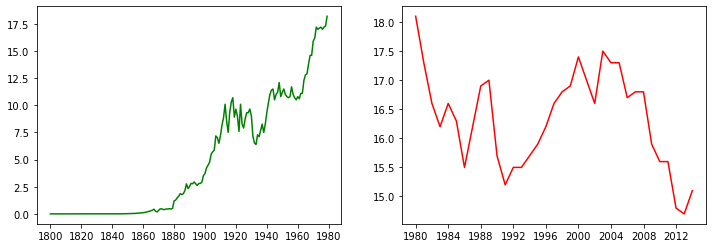

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(train, color='green')

plt.subplot(122)
plt.plot(test['CO2'], color = 'red')

In [39]:
from statsmodels.tsa.ar_model import AutoReg


# Instantiate and fit the AR model with training data
ar_model = AutoReg(train, lags=15).fit()

# Print Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  180
Model:                    AutoReg(15)   Log Likelihood                -131.034
Method:               Conditional MLE   S.D. of innovations              0.535
Date:                Thu, 18 Aug 2022   AIC                             -1.044
Time:                        15:30:09   BIC                             -0.724
Sample:                    01-01-1815   HQIC                            -0.914
                         - 01-01-1979                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0626      0.058      1.071      0.284      -0.052       0.177
CO2.L1         0.8924      0.078     11.435      0.000       0.739       1.045
CO2.L2         0.0293      0.104      0.281      0.7

RMSE: 9.682122722990846
MAE: 9.41078179036637


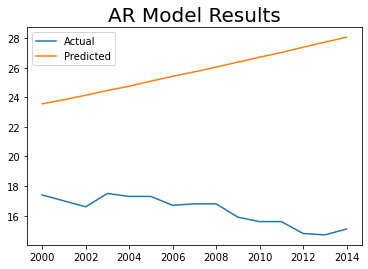

In [40]:
ar_forecast = ar_model.predict('2000-01-01', '2014-01-01')

plt.title('AR Model Results', size=20)
plt.plot(data.loc['2000-01-01':,'CO2'],label='Actual')
plt.plot(ar_forecast,label='Predicted')
plt.legend();

print('RMSE:', np.sqrt(mean_squared_error(data.loc['2000-01-01':,'CO2'],ar_forecast)))
print('MAE:', mean_absolute_error(data.loc['2000-01-01':,'CO2'],ar_forecast))



In [47]:
test.head()

,CO2
Year,
1980,18.1
1981,17.3
1982,16.6
1983,16.2
1984,16.6


In [49]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

In [54]:

model = SimpleExpSmoothing(train.values)
model_fitted = model.fit()

In [57]:

print('coefficients',model_fitted.params)
predictions = model_fitted.predict(start=len(train), end=len(train) + len(test)-1)
print(predictions)

coefficients {'smoothing_level': 0.9508931192982845, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 0.005679728221868851, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
[18.15554011 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011
 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011
 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011
 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011
 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011
 18.15554011 18.15554011 18.15554011 18.15554011 18.15554011]


### Choosing a model
Exponential smoothings methods are appropriate for non-stationary data (ie data with a trend and seasonal data).

ARIMA models should be used on stationary data only. One should therefore remove the trend of the data (via deflating or logging), and then look at the differenced series.

<h3 style="color:orange;">Smoothing Techniques </h3>
<p> 

1) Simple Moving Average

2) Moving AverageSimple 

3) Exponential SmoothinDouble

4) Exponential Smoothing

5) Holt's Exponential Smoothing</p>

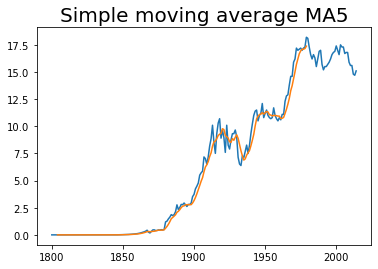

In [72]:
data1['MA5'] = train['CO2'].rolling(window=5).mean()
plt.title('Simple moving average MA5', size=20)
plt.plot(data1['CO2'], label='Original')
plt.plot(data1['MA5'], label='MA5')

In [73]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

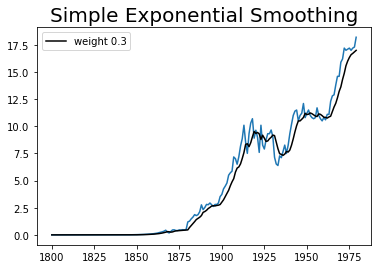

In [74]:
 # Simple Exponential Smoothing

fit1 = SimpleExpSmoothing(train.CO2).fit(smoothing_level=0.3, optimized=False)

plt.title('Simple Exponential Smoothing', size=20)
plt.plot(train.CO2)
plt.plot(fit1.fittedvalues, color='black', label = 'weight 0.3')
plt.legend();

In [75]:
ses_model = SimpleExpSmoothing(train["CO2"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = train.index[0],end = train.index[-1])
MAPE(pred_ses,data.CO2)

134491.143304654

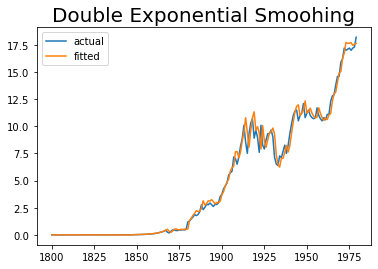

In [76]:
 from statsmodels.tsa.holtwinters import ExponentialSmoothing
doublexp = ExponentialSmoothing(train.CO2, trend='mul').fit()

plt.title('Double Exponential Smoohing', size=20)
plt.plot(train.CO2, label = 'actual')
plt.plot(doublexp.fittedvalues, label = 'fitted')
plt.legend()

In [78]:
hwe_model_mul_add = ExponentialSmoothing(train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = train.index[0],end = train.index[-1])
MAPE(pred_hwe_mul_add,train.CO2)

2198796.387721806

In [79]:
##### Holt method 
hw_model = Holt(train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = train.index[0],end = train.index[-1])
MAPE(pred_hw,train.CO2) 

4076514.536585586

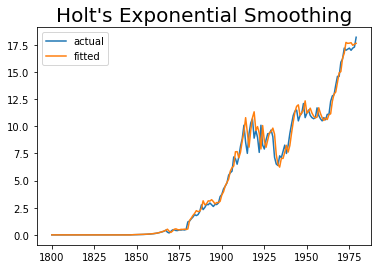

In [80]:
holtfit2 = Holt(train.CO2, exponential=True).fit() # Linear trend

plt.title("Holt's Exponential Smoothing", size=20)
plt.plot(train.CO2, label = 'actual')
plt.plot(holtfit2.fittedvalues, label = 'fitted')
plt.legend(); 

In [82]:
hwe_model_add_add = ExponentialSmoothing(train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [94]:
test.head()

,CO2
Year,
1980,18.1
1981,17.3
1982,16.6
1983,16.2
1984,16.6


In [91]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(30)

180    18.322872
181    18.188646
182    18.394439
183    18.773492
184    19.013792
185    19.080450
186    19.151738
187    19.317863
188    19.695909
189    19.970386
190    20.109141
191    20.183405
192    20.404070
193    20.269844
194    20.475637
195    20.854690
196    21.094989
197    21.161648
198    21.232936
199    21.399061
200    21.777107
201    22.051583
202    22.190339
203    22.264602
204    22.485268
205    22.351041
206    22.556834
207    22.935888
208    23.176187
209    23.242845
dtype: float64

<h2 style="color:#DC7633;">Testing the data set by dicky-fuller method: </h2>


In [24]:
import matplotlib.pyplot as plt
%matplotlib  inline
from pandas import read_csv


In [25]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(dataframe.CO2, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.3422310857301318
2. P-Value :  0.6096370422209317
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 213
5. Critical Values :
	 1% :  -3.461429147102264
	 5% :  -2.875206950587861
	 10% :  -2.5740544497344002


In [26]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(dataframe1.CO2, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.3422310857301318
2. P-Value :  0.6096370422209317
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 213
5. Critical Values :
	 1% :  -3.461429147102264
	 5% :  -2.875206950587861
	 10% :  -2.5740544497344002


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         Here in the output, we can see that the p-value of the data set is more than 0.05.<br> 
            Because of this reason only,  we can interpret the data as non-stationary
        </p>
    </div>


<h2 style="color:#DC7633;">log-transformed time-series </h2>


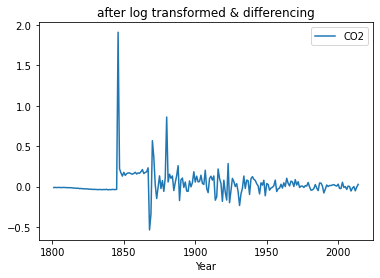

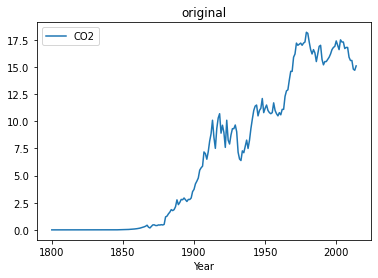

In [16]:
import numpy as np
log_data = pd.DataFrame(data.CO2.apply(lambda x : np.log(x)))
log_diff = log_data - log_data.shift()
#ax1 = plt.subplot()
log_diff.plot(title='after log transformed & differencing');
ax2 = plt.subplot()
data.plot(title='original'); 

In [17]:
test = adfuller(log_diff.dropna().CO2)
print("p-value :", test[1]) 

p-value : 1.2565875448383859e-23


In [27]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(dataframe.dropna().CO2)
print("1. ADF : ",test[0])
print("2. P-Value : ", test[1])
print("3. Num Of Lags : ", test[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", test[3])
print("5. Critical Values :")
for key, val in test[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.3422310857301318
2. P-Value :  0.6096370422209317
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 213
5. Critical Values :
	 1% :  -3.461429147102264
	 5% :  -2.875206950587861
	 10% :  -2.5740544497344002


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        1) We try to normalize the seasonality value by the difference of log to CO2 count and shifted 
    the log value of CO2 count to one step.  <br><br>
    2) we have got a good p-value near about 0.02 and lower than 0.05 in that we can consider over data is stationary.
        </p>
    </div>
    

<h2 style="color:#DC7633;">Moving Average </h2>


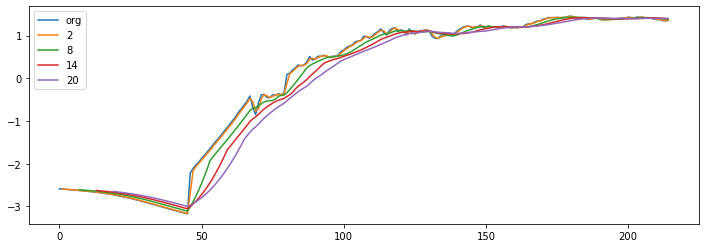

In [28]:
plt.figure(figsize=(12,4))
dataframe.CO2.plot(label="org")
for i in range(2,24,6):
    dataframe["CO2"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        1) Here we can see the window size like 2, 8, 14,20 and the best fitted window size is 2 we will select 
        </p>
    </div>

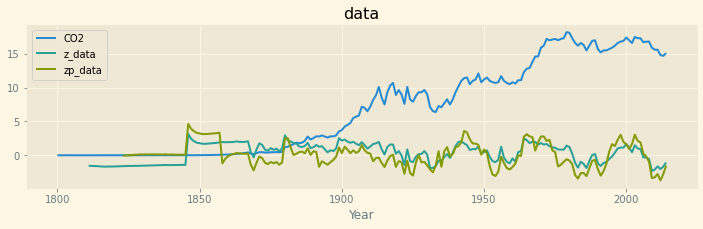

In [30]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('Solarize_Light2')
#r = requests.get('https://datamarket.com/api/v1/list.json?ds=22qx')
#jobj = json.loads(r.text[18:-1])
#data = jobj[0]['data']
df = data
train = df.iloc[:180, :]
test = df.iloc[180:, :]
pred = test.copy()
df.plot(figsize=(12,3));
plt.title('data');

df['z_data'] = (df['CO2'] - df.CO2.rolling(window=12).mean()) / df.CO2.rolling(window=12).std()
df['zp_data'] = df['z_data'] - df['z_data'].shift(12)
def plot_rolling(df):
    fig, ax = plt.subplots(3,figsize=(12, 9))
    ax[0].plot(df.index, df.CO2, label='raw data')
    ax[0].plot(df.data.rolling(window=12).mean(), label="rolling mean");
    ax[0].plot(df.data.rolling(window=12).std(), label="rolling std (x10)");
    ax[0].legend()
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    ax[1].plot(df.index, df.z_data, label="de-trended data")
    ax[1].plot(df.z_data.rolling(window=12).mean(), label="rolling mean");
    ax[1].plot(df.z_data.rolling(window=12).std(), label="rolling std (x10)");
    ax[1].legend()
    plt.figure(figsize=(12,4))
    plt.subplot(122)
    ax[2].plot(df.index, df.zp_data, label="12 lag differenced de-trended data")
    ax[2].plot(df.zp_data.rolling(window=12).mean(), label="rolling mean");
    ax[2].plot(df.zp_data.rolling(window=12).std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

In [32]:



print("\n > Is the 12-lag differenced de-trended data stationary ?")
dftest = adfuller(df.zp_data.dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -0.378
P-value = 0.914
Critical values :
	1%: -3.4612821203214907 - The data is not stationary with 99% confidence
	5%: -2.875142613826617 - The data is not stationary with 95% confidence
	10%: -2.574020122281422 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -3.691
P-value = 0.004
Critical values :
	1%: -3.462980134086401 - The data is  stationary with 99% confidence
	5%: -2.875885461947131 - The data is  stationary with 95% confidence
	10%: -2.5744164898444515 - The data is  stationary with 90% confidence

 > Is the 12-lag differenced de-trended data stationary ?
Test statistic = -3.835
P-value = 0.003
Critical values :
	1%: -3.4674201432469816 - The data is  stationary with 99% confidence
	5%: -2.877826051844538 - The data is  stationary with 95% confidence
	10%: -2.575452082332012 - The data is  stationary with 90% confidence
